In [92]:
import numpy as np
import matplotlib.pyplot as plt

#**6.1. 2D Brownian motion**

In [ ]:
def brownian(interval, step):
  n = int(interval / step)
  B = [0]
  for i in range(n):
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
  return B

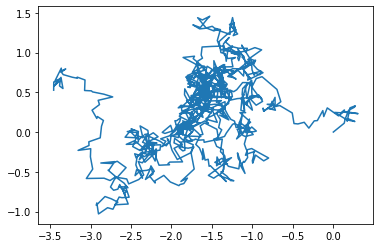

In [ ]:
B1 = brownian(5, 0.005)
B2 = brownian(5, 0.005)
plt.plot(B1, B2)

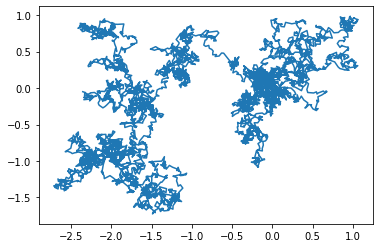

In [ ]:
B1 = brownian(5, 0.001)
B2 = brownian(5, 0.001)
plt.plot(B1, B2)

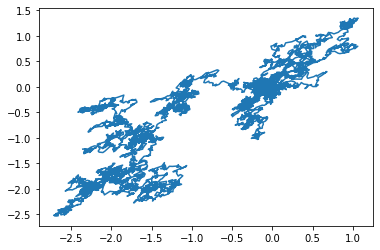

In [ ]:
W1 = np.array(B1)
W2 = 0.5 * np.array(B1) + np.sqrt(0.75) * np.array(B2)
plt.plot(W1, W2)

#**6.2. Brownian martingales**

In [ ]:
B1 = []
B2 = []
for i in range(10):
  B1t = brownian(1, 0.01)
  B2t = brownian(1, 0.01)
  B1.append(B1t)
  B2.append(B2t)
B1 = np.array(B1)
B2 = np.array(B2)

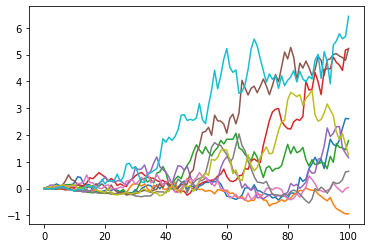

In [ ]:
t = np.linspace(0.0, 1.0, 101)
X = (B1 ** 2 + B2 ** 2) - t
for i in range(10):
  plt.plot(X[i])

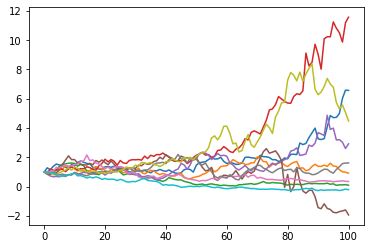

In [ ]:
Y = np.exp(B1) * np.cos(B2)
for i in range(10):
  plt.plot(Y[i])

In [ ]:
def integral(X, B):
  I = [0]
  for i in range(len(X)-1):
    I.append(I[i] + X[i] * (B[i+1] - B[i]))
  return np.array(I)

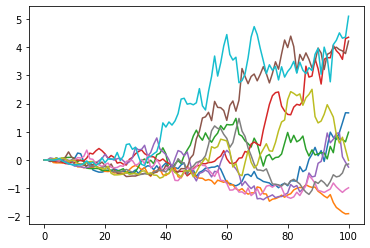

In [ ]:
for i in range(10):
  plt.plot(integral(2*B1[i], B1[i]) + integral(2*B2[i], B2[i]))

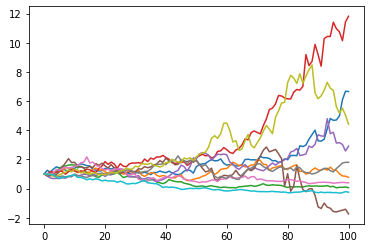

In [ ]:
for i in range(10):
  plt.plot(1 + integral(np.exp(B1[i])*np.cos(B2[i]), B1[i]) - integral(np.exp(B1[i])*np.sin(B2[i]), B2[i]))

#**6.3. Dirichlet problem**

In [93]:
def brownian_x(interval, step, x):
  n = int(interval / step)
  B = [x]
  for i in range(n):
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
  return B

In [94]:
h = 0
for j in range(1000):
  B1 = np.array(brownian_x(1, 0.01, 0))
  B2 = np.array(brownian_x(1, 0.01, 0.5))
  if 1 in list(((B1 ** 2 + B2 ** 2) > 1) + 0):
    i = list(((B1 ** 2 + B2 ** 2) > 1) + 0).index(1)
    if B2[i] >= 0:
      h += 1
    else:
      h -= 1
h = h/1000
h

0.565

In [108]:
H = np.zeros((201,201))
for y in range(100,-101,-1):
  for x in range(-100,101):
    h = 0
    for j in range(100):
      B1 = np.array(brownian_x(1, 0.01, x*0.01))
      B2 = np.array(brownian_x(1, 0.01, y*0.01))
      if 1 in list(((B1 ** 2 + B2 ** 2) > 1) + 0):
        i = list(((B1 ** 2 + B2 ** 2) > 1) + 0).index(1)
        if B2[i] >= 0:
          h += 1
        else :
          h -= 1
    h = h/100
    H[100-y][x+100] = h

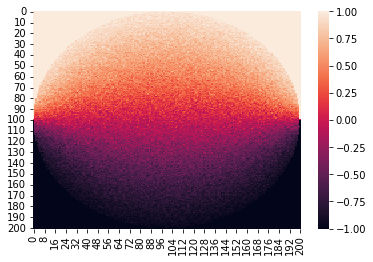

In [109]:
import seaborn as sns
ax = sns.heatmap(H)